# Reduced Model with autoreduce attempt 5
7.05.2020 <br>
Try to amend function already in autoReduce package.

In [ ]:
# From auto_reduce, converters.py
def sbml_to_ode(filename):
    
  # 
  # read the SBML from file 
  # 
    import libsbml as lb 
    import sys
    
    # Read SBML file
    doc = lb.readSBMLFromFile(filename)

    # Check for some kind of errors
    if doc.getNumErrors(lb.LIBSBML_SEV_FATAL):
        print('Encountered serious errors while reading file')
        print(doc.getErrorLog().toString())
        sys.exit(1)
    # clear errors
    doc.getErrorLog().clearLog()
    #
    # perform conversions
    #
    
    # addOption does stuff, sets keys and values??
    props = lb.ConversionProperties()
   #print(props)
    
    props.addOption("promoteLocalParameters", True)
    
    if doc.convert(props) != lb.LIBSBML_OPERATION_SUCCESS: 
        print('The document could not be converted')
        print(doc.getErrorLog().toString())
        
    props = lb.ConversionProperties()
    
    props.addOption("expandInitialAssignments", True)
    
    if doc.convert(props) != lb.LIBSBML_OPERATION_SUCCESS: 
        print('The document could not be converted')
        print(doc.getErrorLog().toString())
        
    props = lb.ConversionProperties()
    
    props.addOption("expandFunctionDefinitions", True)
    
   # print(props.getDescription)
    
    if doc.convert(props) != lb.LIBSBML_OPERATION_SUCCESS: 
        print('The document could not be converted')
        print(doc.getErrorLog().toString())
    
  #
  # figure out which species are variable 
  #
    mod = doc.getModel()
    variables = {}
    
    
    for i in range(mod.getNumSpecies()): 
        species = mod.getSpecies(i)
        if species.getBoundaryCondition() == True or species.getId() in variables.keys():
            continue
        variables[species.getId()] = []


    for i in range(mod.getNumReactions()): 
        reaction = mod.getReaction(i)
        kinetics = reaction.getKineticLaw()  
        
    # generated_code.extend('    {0} = {1}\n'.format(reaction.getId(),  kinetics.getFormula()))
        
    for j in range(reaction.getNumReactants()): 
        ref = reaction.getReactant(j)
        species = mod.getSpecies(ref.getSpecies())
        if species.getBoundaryCondition() == True: 
            continue
        if ref.getStoichiometry() == 1.0: 
            variables[species.getId()].append('-{0}'.format(reaction.getId()))
        else:
            variables[species.getId()].append('-({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
    for j in range(reaction.getNumProducts()): 
        ref = reaction.getProduct(j)
        species = mod.getSpecies(ref.getSpecies())
        if species.getBoundaryCondition() == True: 
            continue
        if ref.getStoichiometry() == 1.0: 
            variables[species.getId()].append('{0}'.format(reaction.getId()))
        else:
            variables[species.getId()].append('({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
            
    print(variables)
    
    return None 
    



In [ ]:
sbml_to_ode("CRN.xml")

In [ ]:
filename = 'CRN.xml'
import libsbml as lb
doc = lb.readSBMLFromFile(filename)

# Check for some kind of errors
if doc.getNumErrors(lb.LIBSBML_SEV_FATAL):
    print('Encountered serious errors while reading file')
    print(doc.getErrorLog().toString())
    sys.exit(1)
# clear errors
doc.getErrorLog().clearLog()
#
# perform conversions
#

props = lb.ConversionProperties()
print(props)

In [ ]:
mod = doc.getModel()

In [ ]:
mod.unsetNotes

In [ ]:
species_list = []
variables = {}

for species in mod.getListOfSpecies():
    #species_list.append(species.getID())
    variables[species.getId()] = []
    
for reaction in mod.getListOfReactions():
    # Get formula string for each reaction
    print(reaction.getKineticLaw().getFormula())
    
    # extract ODE rhs for each species symbol created earlier
    

In [ ]:
variables

In [ ]:
lb.ConversionProperties.addOption?

**Have to make for loop to get the ODEs**

## Some Model I found Online
https://groups.google.com/forum/#!topic/sbml-discuss/inS4Lzp3Ri8

In [ ]:
from libsbml import *
import sys


def generateCodeForFile(filename, t0=0, tEnd=10, numPoints=1000):
  # 
  # read the SBML from file 
  # 
  doc = readSBMLFromFile(filename)
  if doc.getNumErrors(LIBSBML_SEV_FATAL):
    print('Encountered serious errors while reading file')
    print(doc.getErrorLog().toString())
    sys.exit(1)
    
  # clear errors
  doc.getErrorLog().clearLog()
  
  #
  # perform conversions
  #
  props = ConversionProperties()
  props.addOption("promoteLocalParameters", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandInitialAssignments", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandFunctionDefinitions", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  #
  # figure out which species are variable 
  #
  mod = doc.getModel()
  variables = {}
  
  for i in range(mod.getNumSpecies()): 
     species = mod.getSpecies(i)
    # if species.getBoundaryCondition() == True or variables.has_key(species.getId()):
     if species.getBoundaryCondition() == True or (species.getId() in variables.keys()):


       continue
     variables[species.getId()] = []
  
  #
  # start generating the code by appending to bytearray
  #
  generated_code = bytearray()
  generated_code.extend('from numpy import *\n')
  generated_code.extend('from matplotlib.pylab import *\n')
  generated_code.extend('from matplotlib.pyplot import *\n')
  generated_code.extend('from scipy.integrate import odeint \n')
  
  generated_code.extend('\n')
  generated_code.extend('def simulateModel(t0, tend, numPoints):\n')
  
  # write out compartment values 
  generated_code.extend('  \n')
  generated_code.extend('  #compartments\n')
  for i in range(mod.getNumCompartments()):
    element = mod.getCompartment(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getSize()))
  
  # write out parameter values 
  generated_code.extend('  \n')
  generated_code.extend('  #global parameters\n')
  for i in range(mod.getNumParameters()):
    element = mod.getParameter(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getValue()))
  
  # write out boundary species 
  generated_code.extend('  \n')
  generated_code.extend('  #boundary species\n')
  for i in range(mod.getNumSpecies()):
    element = mod.getSpecies(i)
    if element.getBoundaryCondition() == False: 
      continue 
    if element.isSetInitialConcentration(): 
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialConcentration()))
    else:
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialAmount()))  
  
  # write derive function
  generated_code.extend('  \n')
  generated_code.extend('  def ode_fun(x, t):\n')
  for i in range(len(variables.keys())): 
    generated_code.extend('    {0} = __Y__[{1}]\n'.format(list(variables.keys())[i], i))
  generated_code.extend('\n')
  
  for i in range(mod.getNumReactions()): 
    reaction = mod.getReaction(i)
    kinetics = reaction.getKineticLaw()  
    
    generated_code.extend('    {0} = {1}\n'.format(reaction.getId(),  kinetics.getFormula()))
    
    for j in range(reaction.getNumReactants()): 
      ref = reaction.getReactant(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('-{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('-({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
    for j in range(reaction.getNumProducts()): 
      ref = reaction.getProduct(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
  
  generated_code.extend('\n')
    
  generated_code.extend('    return array([')
  for i in range(len(variables.keys())):
    for eqn in variables[list(variables.keys())[i]]:
      generated_code.extend(' + ({0})'.format(eqn))
    if i + 1 < len(variables.keys()):
      generated_code.extend(',\n      ')
  generated_code.extend('    ])\n')
  generated_code.extend('\n')
  
  generated_code.extend('  time = linspace(t0, tend, numPoints)\n')
  
  # 
  # write out initial concentrations 
  # 
  generated_code.extend('  yinit= array([')
  count = 0
  for key in variables.keys():
    # get initialValue 
    element = mod.getElementBySId(key)
    if element.getTypeCode() == SBML_PARAMETER: 
      generated_code.extend('{0}'.format(element.getValue()))
    elif element.getTypeCode() == SBML_SPECIES: 
      if element.isSetInitialConcentration(): 
        generated_code.extend('{0}'.format(element.getInitialConcentration()))
      else: 
        generated_code.extend('{0}'.format(element.getInitialAmount()))
    else: 
      generated_code.extend('{0}'.format(element.getSize()))
    count += 1
    if count < len(variables.keys()):
      generated_code.extend(', ')
  generated_code.extend('])\n')
  generated_code.extend('  \n')
  
  generated_code.extend('  y = odeint(ode_fun, yinit, time)\n')
  generated_code.extend('\n')
  
  generated_code.extend('  return time, y\n')
  generated_code.extend('\n')
  generated_code.extend('\n')
  generated_code.extend('time, result = simulateModel({0}, {1}, {2})\n'.format(t0, tEnd, numPoints))
  generated_code.extend('\n')
  
  #
  # write out plotting code 
  #
  generated_code.extend('fig = figure()\n')
  generated_code.extend('ax = subplot(111)\n')
  
  for i in range(len(variables.keys())): 
    generated_code.extend('plot(time,result[:,{0}], label="{1}", lw=1.5)\n'.format(i, list(variables.keys())[i]))
    
  generated_code.extend('box = ax.get_position()\n')
  generated_code.extend('ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])\n')
  generated_code.extend('xlabel("time")\n')
  generated_code.extend('ylabel("concentration")\n')
  generated_code.extend('legend(loc="center left", bbox_to_anchor=(1, 0.5))\n')
  generated_code.extend('show()\n')
  
  #print(str(generated_code))
    
  generated_code.extend('print("AH")')
  # convert generated code to string 
  #generated_code = bytearray(str(generated_code), encoding = 'utf8')
  #result = str(generated_code);

  return generated_code

  

In [ ]:
generated_code = bytearray()
generated_code.extend('from numpy import *\n'.encode('latin-1'))

In [ ]:
generated_code

In [ ]:
result = generateCodeForFile("CRN.xml")

In [ ]:
file = open('generated.py', 'w')
file.write(result)
file.close()

In [ ]:
exec(result)

In [ ]:
string = "Python is interesting."

# string with encoding 'utf-8'
arr = bytearray(string, 'utf-8')
print(arr)

Try making it a string

In [ ]:
from libsbml import *
import sys


def generateCodeForFile(filename, t0=0, tEnd=10, numPoints=1000):
  # 
  # read the SBML from file 
  # 
  doc = readSBMLFromFile(filename)
  if doc.getNumErrors(LIBSBML_SEV_FATAL):
    print('Encountered serious errors while reading file')
    print(doc.getErrorLog().toString())
    sys.exit(1)
    
  # clear errors
  doc.getErrorLog().clearLog()
  
  #
  # perform conversions
  #
  props = ConversionProperties()
  props.addOption("promoteLocalParameters", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandInitialAssignments", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandFunctionDefinitions", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  #
  # figure out which species are variable 
  #
  mod = doc.getModel()
  variables = {}
  
  for i in range(mod.getNumSpecies()): 
     species = mod.getSpecies(i)
    # if species.getBoundaryCondition() == True or variables.has_key(species.getId()):
     if species.getBoundaryCondition() == True or (species.getId() in variables.keys()):


       continue
     variables[species.getId()] = []
  
  #
  # start generating the code by joining to bytearray
  #
  generated_code = ''
  generated_code = generated_code.join('from numpy import *\n')
  generated_code = generated_code.join('from matplotlib.pylab import *\n')
  generated_code = generated_code.join('from matplotlib.pyplot import *\n')
  generated_code = generated_code.join('from scipy.integrate import odeint \n')
  
  generated_code = generated_code.join('\n')
  generated_code = generated_code.join('def simulateModel(t0, tend, numPoints):\n')
  
  # write out compartment values 
  generated_code =  generated_code.join('  \n')
  generated_code =  generated_code.join('  #compartments\n')
  for i in range(mod.getNumCompartments()):
    element = mod.getCompartment(i)
    generated_code = generated_code.join('  {0} = {1}\n'.format(element.getId(), element.getSize()))
  
  # write out parameter values 
  generated_code =  generated_code.join('  \n')
  generated_code =  generated_code.join('  #global parameters\n')
  for i in range(mod.getNumParameters()):
    element = mod.getParameter(i)
    generated_code = generated_code.join('  {0} = {1}\n'.format(element.getId(), element.getValue()))
  
  # write out boundary species 
  generated_code = generated_code.join('  \n')
  generated_code = generated_code.join('  #boundary species\n')
  for i in range(mod.getNumSpecies()):
    element = mod.getSpecies(i)
    if element.getBoundaryCondition() == False: 
      continue 
    if element.isSetInitialConcentration(): 
      generated_code = generated_code.join('  {0} = {1}\n'.format(element.getId(), element.getInitialConcentration()))
    else:
      generated_code = generated_code.join('  {0} = {1}\n'.format(element.getId(), element.getInitialAmount()))  
  
  # write derive function
  generated_code = generated_code.join('  \n')
  generated_code = generated_code.join('  def ode_fun(__Y__, t):\n')
  for i in range(len(variables.keys())): 
    generated_code = generated_code.join('    {0} = __Y__[{1}]\n'.format(list(variables.keys())[i], i))
  generated_code = generated_code.join('\n')
  
  for i in range(mod.getNumReactions()): 
    reaction = mod.getReaction(i)
    kinetics = reaction.getKineticLaw()  
    
    generated_code = generated_code.join('    {0} = {1}\n'.format(reaction.getId(),  kinetics.getFormula()))
    
    for j in range(reaction.getNumReactants()): 
      ref = reaction.getReactant(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('-{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('-({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
    for j in range(reaction.getNumProducts()): 
      ref = reaction.getProduct(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
  
  generated_code = generated_code.join('\n')
    
  generated_code = generated_code.join('    return array([')
  for i in range(len(variables.keys())):
    for eqn in variables[list(variables.keys())[i]]:
      generated_code = generated_code.join(' + ({0})'.format(eqn))
    if i + 1 < len(variables.keys()):
      generated_code = generated_code.join(',\n      ')
  generated_code = generated_code.join('    ])\n')
  generated_code = generated_code.join('\n')
  
  generated_code = generated_code.join('  time = linspace(t0, tend, numPoints)\n')
  
  # 
  # write out initial concentrations 
  # 
  generated_code = generated_code.join('  yinit= array([')
  count = 0
  for key in variables.keys():
    # get initialValue 
    element = mod.getElementBySId(key)
    if element.getTypeCode() == SBML_PARAMETER: 
      generated_code = generated_code.join('{0}'.format(element.getValue()))
    elif element.getTypeCode() == SBML_SPECIES: 
      if element.isSetInitialConcentration(): 
        generated_code = generated_code.join('{0}'.format(element.getInitialConcentration()))
      else: 
        generated_code = generated_code.join('{0}'.format(element.getInitialAmount()))
    else: 
      generated_code = generated_code.join('{0}'.format(element.getSize()))
    count += 1
    if count < len(variables.keys()):
      generated_code = generated_code.join(', ')
  generated_code = generated_code.join('])\n')
  generated_code = generated_code.join('  \n')
  
  generated_code = generated_code.join('  y = odeint(ode_fun, yinit, time)\n')
  generated_code = generated_code.join('\n')
  
  generated_code = generated_code.join('  return time, y\n')
  generated_code = generated_code.join('\n')
  generated_code = generated_code.join('\n')
  generated_code = generated_code.join('time, result = simulateModel({0}, {1}, {2})\n'.format(t0, tEnd, numPoints))
  generated_code = generated_code.join('\n')
  
  #
  # write out plotting code 
  #
  generated_code = generated_code.join('fig = figure()\n')
  generated_code = generated_code.join('ax = subplot(111)\n')
  
  for i in range(len(variables.keys())): 
    generated_code = generated_code.join('plot(time,result[:,{0}], label="{1}", lw=1.5)\n'.format(i, list(variables.keys())[i]))
    
  generated_code = generated_code.join('box = ax.get_position()\n')
  generated_code = generated_code.join('ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])\n')
  generated_code = generated_code.join('xlabel("time")\n')
  generated_code = generated_code.join('ylabel("concentration")\n')
  generated_code = generated_code.join('legend(loc="center left", bbox_to_anchor=(1, 0.5))\n')
  generated_code = generated_code.join('show()\n')
  
  #print(str(generated_code))
    
  generated_code = generated_code.join('print("AH")')
  # convert generated code to string 
  #generated_code = bytearray(str(generated_code), encoding = 'utf8')
  #result = str(generated_code);

  return generated_code

  

In [ ]:
result2 = generateCodeForFile("CRN.xml")

In [ ]:
result2

Try to do the .encode(latin-1 thing

In [ ]:
from libsbml import *
import sys


def generateCodeForFile(filename, t0=0, tEnd=10, numPoints=1000):
  # 
  # read the SBML from file 
  # 
  doc = readSBMLFromFile(filename)
  if doc.getNumErrors(LIBSBML_SEV_FATAL):
    print('Encountered serious errors while reading file')
    print(doc.getErrorLog().toString())
    sys.exit(1)
    
  # clear errors
  doc.getErrorLog().clearLog()
  
  #
  # perform conversions
  #
  props = ConversionProperties()
  props.addOption("promoteLocalParameters", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandInitialAssignments", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandFunctionDefinitions", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  #
  # figure out which species are variable 
  #
  mod = doc.getModel()
  variables = {}
  
  for i in range(mod.getNumSpecies()): 
     species = mod.getSpecies(i)
    # if species.getBoundaryCondition() == True or variables.has_key(species.getId()):
     if species.getBoundaryCondition() == True or (species.getId() in variables.keys()):


       continue
     variables[species.getId()] = []
  
  #
  # start generating the code by appending to bytearray
  #
  generated_code = bytearray()
  generated_code.extend('from numpy import *\n'.encode('latin-1'))
  generated_code.extend('from matplotlib.pylab import *\n'.encode('latin-1'))
  generated_code.extend('from matplotlib.pyplot import *\n'.encode('latin-1'))
  generated_code.extend('from scipy.integrate import odeint \n'.encode('latin-1'))
  
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('def simulateModel(t0, tend, numPoints):\n'.encode('latin-1'))
  
  # write out compartment values 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #compartments\n'.encode('latin-1'))
  for i in range(mod.getNumCompartments()):
    element = mod.getCompartment(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getSize()).encode('latin-1'))
  
  # write out parameter values 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #global parameters\n'.encode('latin-1'))
  for i in range(mod.getNumParameters()):
    element = mod.getParameter(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getValue()).encode('latin-1'))
  
  # write out boundary species 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #boundary species\n'.encode('latin-1'))
  for i in range(mod.getNumSpecies()):
    element = mod.getSpecies(i)
    if element.getBoundaryCondition() == False: 
      continue 
    if element.isSetInitialConcentration(): 
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialConcentration()).encode('latin-1'))
    else:
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialAmount()).encode('latin-1'))  
  
  # write derive function
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  def ode_fun(__Y__, t):\n'.encode('latin-1'))
    
   # Set all species equal to a __Y__[i] 
  for i in range(len(variables.keys())): 
    generated_code.extend('    {0} = __Y__[{1}]\n'.format(list(variables.keys())[i], i).encode('latin-1'))
    
  generated_code.extend('\n'.encode('latin-1'))
  
  for i in range(mod.getNumReactions()): 
    reaction = mod.getReaction(i)
    kinetics = reaction.getKineticLaw()  
    
    generated_code.extend('    {0} = {1}\n'.format(reaction.getId(),  kinetics.getFormula()).encode('latin-1'))
    
    for j in range(reaction.getNumReactants()): 
      ref = reaction.getReactant(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('-{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('-({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
    for j in range(reaction.getNumProducts()): 
      ref = reaction.getProduct(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
  
  generated_code.extend('\n'.encode('latin-1'))
    
  generated_code.extend('    return array(['.encode('latin-1'))
 # generated_code.extend('    print( array(['.encode('latin-1'))
  for i in range(len(variables.keys())):
    for eqn in variables[list(variables.keys())[i]]:
      generated_code.extend(' + ({0})'.format(eqn).encode('latin-1'))
    if i + 1 < len(variables.keys()):
      generated_code.extend(',\n      '.encode('latin-1'))
  generated_code.extend('    ])\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  generated_code.extend('  time = linspace(t0, tend, numPoints)\n'.encode('latin-1'))
  
  # 
  # write out initial concentrations 
  # 
  generated_code.extend('  yinit= array(['.encode('latin-1'))
  count = 0
  for key in variables.keys():
    # get initialValue 
    element = mod.getElementBySId(key)
    if element.getTypeCode() == SBML_PARAMETER: 
      generated_code.extend('{0}'.format(element.getValue()).encode('latin-1'))
    elif element.getTypeCode() == SBML_SPECIES: 
      if element.isSetInitialConcentration(): 
        generated_code.extend('{0}'.format(element.getInitialConcentration()).encode('latin-1'))
      else: 
        generated_code.extend('{0}'.format(element.getInitialAmount()).encode('latin-1'))
    else: 
      generated_code.extend('{0}'.format(element.getSize()).encode('latin-1'))
    count += 1
    if count < len(variables.keys()):
      generated_code.extend(', '.encode('latin-1'))
  generated_code.extend('])\n'.encode('latin-1'))
  generated_code.extend('  \n'.encode('latin-1'))
  
  generated_code.extend('  y = odeint(ode_fun, yinit, time)\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  generated_code.extend('  return time, y\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('time, result = simulateModel({0}, {1}, {2})\n'.format(t0, tEnd, numPoints).encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  #
  # write out plotting code 
  #
  generated_code.extend('fig = figure()\n'.encode('latin-1'))
  generated_code.extend('ax = subplot(111)\n'.encode('latin-1'))
  
  for i in range(len(variables.keys())): 
    generated_code.extend('plot(time,result[:,{0}], label="{1}", lw=1.5)\n'.format(i, list(variables.keys())[i]).encode('latin-1'))
    
  generated_code.extend('box = ax.get_position()\n'.encode('latin-1'))
  generated_code.extend('ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])\n'.encode('latin-1'))
  generated_code.extend('xlabel("time")\n'.encode('latin-1'))
  generated_code.extend('ylabel("concentration")\n'.encode('latin-1'))
  generated_code.extend('legend(loc="center left", bbox_to_anchor=(1, 0.5))\n'.encode('latin-1'))
  generated_code.extend('show()\n'.encode('latin-1'))
  
  #print(str(generated_code))
  #generated_code.extend('a = 4\n'.encode('latin-1')) THIS WORKS
  
  # convert generated code to string 
  #generated_code = bytearray(str(generated_code), encoding = 'utf8')
  #result = str(generated_code);

  return generated_code

  

In [ ]:
result3 = generateCodeForFile('CRN.xml', tEnd = 75)

In [ ]:
print(result3)

In [ ]:
exec(result3)

# Very Nice!

Now, we have to try to just extract the ODE's and put it in an 'f' format that can be used with autoReduce

Every element of `f` is a separate sympy object. If we look at the type(f[0]), it read symp.core.add.Add

In [ ]:
from auto_reduce import *
from auto_reduce.utils import get_ODE

In [ ]:
print('def ode_fun(__Y__, t):\n    enzyme_hex = __Y__[0]\n    metabolite_atp = __Y__[1]\n    molecule_glucose = __Y__[2]\n    molecule_g6p = __Y__[3]\n    metabolite_adp = __Y__[4]\n    complex_enzyme_hex_metabolite_atp_molecule_glucose = __Y__[5]\n    complex_enzyme_hex_metabolite_adp_molecule_g6p = __Y__[6]\n    enzyme_pgi = __Y__[7]\n    molecule_f6p = __Y__[8]\n    complex_enzyme_pgi_molecule_g6p = __Y__[9]\n    complex_enzyme_pgi_molecule_f6p = __Y__[10]\n    enzyme_pfk = __Y__[11]\n    molecule_f16p = __Y__[12]\n    complex_enzyme_pfk_metabolite_atp_molecule_f6p = __Y__[13]\n    complex_enzyme_pfk_metabolite_adp_molecule_f16p = __Y__[14]\n    enzyme_ald_tpi = __Y__[15]\n    molecule_g3p = __Y__[16]\n    complex_enzyme_ald_tpi_molecule_f16p = __Y__[17]\n    complex_enzyme_ald_tpi_2x_molecule_g3p = __Y__[18]\n    enzyme_gapN = __Y__[19]\n    metabolite_nadp = __Y__[20]\n    molecule_3pg = __Y__[21]\n    metabolite_nadph = __Y__[22]\n    complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p = __Y__[23]\n    complex_enzyme_gapN_2x_metabolite_nadph_2x_molecule_3pg = __Y__[24]\n    enzyme_mGapDH = __Y__[25]\n    metabolite_pi = __Y__[26]\n    molecule_13bpg = __Y__[27]\n    complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p = __Y__[28]\n    complex_enzyme_mGapDH_2x_metabolite_nadph_molecule_13bpg = __Y__[29]\n    enzyme_pgk = __Y__[30]\n    complex_enzyme_pgk_metabolite_adp_molecule_13bpg = __Y__[31]\n    complex_enzyme_pgk_metabolite_atp_2x_molecule_3pg = __Y__[32]\n    enzyme_pgm = __Y__[33]\n    molecule_2pg = __Y__[34]\n    complex_enzyme_pgm_2x_molecule_3pg = __Y__[35]\n    complex_enzyme_pgm_2x_molecule_2pg = __Y__[36]\n    enzyme_eno = __Y__[37]\n    molecule_pep = __Y__[38]\n    complex_enzyme_eno_2x_molecule_2pg = __Y__[39]\n    complex_enzyme_eno_2x_molecule_pep = __Y__[40]\n    enzyme_pyk = __Y__[41]\n    molecule_pyruvate = __Y__[42]\n    complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep = __Y__[43]\n    complex_enzyme_pyk_2x_metabolite_atp_2x_molecule_pyruvate = __Y__[44]\n    enzyme_alsS = __Y__[45]\n    molecule_acetolac = __Y__[46]\n    complex_enzyme_alsS_2x_molecule_pyruvate = __Y__[47]\n    complex_enzyme_alsS_molecule_acetolac = __Y__[48]\n    enzyme_IlvC = __Y__[49]\n    molecule_23dih3mebut = __Y__[50]\n    complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac = __Y__[51]\n    complex_enzyme_IlvC_metabolite_nadp_molecule_23dih3mebut = __Y__[52]\n    enzyme_IlvD = __Y__[53]\n    molecule_3me2oxo = __Y__[54]\n    complex_enzyme_IlvD_molecule_23dih3mebut = __Y__[55]\n    complex_enzyme_IlvD_molecule_3me2oxo = __Y__[56]\n    enzyme_kivD = __Y__[57]\n    molecule_isobutanal = __Y__[58]\n    complex_enzyme_kivD_molecule_3me2oxo = __Y__[59]\n    complex_enzyme_kivD_molecule_isobutanal = __Y__[60]\n    enzyme_yahk = __Y__[61]\n    molecule_isobutanol = __Y__[62]\n    complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal = __Y__[63]\n    complex_enzyme_yahk_metabolite_nadp_molecule_isobutanol = __Y__[64]\n    enzyme_atpase = __Y__[65]\n    complex_enzyme_atpase_metabolite_atp = __Y__[66]\n    complex_enzyme_atpase_metabolite_adp_metabolite_pi = __Y__[67]\n\n    r0 = r0_k * enzyme_hex * metabolite_atp * molecule_glucose\n    r0_1 = r0_1_k * complex_enzyme_hex_metabolite_atp_molecule_glucose\n    r2 = r2_k * complex_enzyme_hex_metabolite_atp_molecule_glucose\n    r3 = r3_k * complex_enzyme_hex_metabolite_adp_molecule_g6p\n    r3_1 = r3_1_k * enzyme_hex * molecule_g6p * metabolite_adp\n    r5 = r5_k * enzyme_pgi * molecule_g6p\n    r5_1 = r5_1_k * complex_enzyme_pgi_molecule_g6p\n    r7 = r7_k * complex_enzyme_pgi_molecule_g6p\n    r8 = r8_k * complex_enzyme_pgi_molecule_f6p\n    r8_1 = r8_1_k * enzyme_pgi * molecule_f6p\n    r10 = r10_k * enzyme_pfk * metabolite_atp * molecule_f6p\n    r10_1 = r10_1_k * complex_enzyme_pfk_metabolite_atp_molecule_f6p\n    r12 = r12_k * complex_enzyme_pfk_metabolite_atp_molecule_f6p\n    r13 = r13_k * complex_enzyme_pfk_metabolite_adp_molecule_f16p\n    r13_1 = r13_1_k * enzyme_pfk * molecule_f16p * metabolite_adp\n    r15 = r15_k * enzyme_ald_tpi * molecule_f16p\n    r15_1 = r15_1_k * complex_enzyme_ald_tpi_molecule_f16p\n    r17 = r17_k * complex_enzyme_ald_tpi_molecule_f16p\n    r18 = r18_k * complex_enzyme_ald_tpi_2x_molecule_g3p\n    r18_1 = r18_1_k * enzyme_ald_tpi * pow(molecule_g3p, 2)\n    r20 = r20_k * enzyme_gapN * pow(metabolite_nadp, 2) * pow(molecule_g3p, 2)\n    r20_1 = r20_1_k * complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p\n    r22 = r22_k * complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p\n    r23 = r23_k * complex_enzyme_gapN_2x_metabolite_nadph_2x_molecule_3pg\n    r23_1 = r23_1_k * enzyme_gapN * pow(molecule_3pg, 2) * pow(metabolite_nadph, 2)\n    r25 = r25_k * enzyme_mGapDH * metabolite_pi * pow(metabolite_nadp, 2) * pow(molecule_g3p, 2)\n    r25_1 = r25_1_k * complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p\n    r27 = r27_k * complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p\n    r28 = r28_k * complex_enzyme_mGapDH_2x_metabolite_nadph_molecule_13bpg\n    r28_1 = r28_1_k * enzyme_mGapDH * molecule_13bpg * pow(metabolite_nadph, 2)\n    r30 = r30_k * enzyme_pgk * metabolite_adp * molecule_13bpg\n    r30_1 = r30_1_k * complex_enzyme_pgk_metabolite_adp_molecule_13bpg\n    r32 = r32_k * complex_enzyme_pgk_metabolite_adp_molecule_13bpg\n    r33 = r33_k * complex_enzyme_pgk_metabolite_atp_2x_molecule_3pg\n    r33_1 = r33_1_k * enzyme_pgk * pow(molecule_3pg, 2) * metabolite_atp\n    r35 = r35_k * enzyme_pgm * pow(molecule_3pg, 2)\n    r35_1 = r35_1_k * complex_enzyme_pgm_2x_molecule_3pg\n    r37 = r37_k * complex_enzyme_pgm_2x_molecule_3pg\n    r38 = r38_k * complex_enzyme_pgm_2x_molecule_2pg\n    r38_1 = r38_1_k * enzyme_pgm * pow(molecule_2pg, 2)\n    r40 = r40_k * enzyme_eno * pow(molecule_2pg, 2)\n    r40_1 = r40_1_k * complex_enzyme_eno_2x_molecule_2pg\n    r42 = r42_k * complex_enzyme_eno_2x_molecule_2pg\n    r43 = r43_k * complex_enzyme_eno_2x_molecule_pep\n    r43_1 = r43_1_k * enzyme_eno * pow(molecule_pep, 2)\n    r45 = r45_k * enzyme_pyk * pow(metabolite_adp, 2) * pow(molecule_pep, 2)\n    r45_1 = r45_1_k * complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep\n    r47 = r47_k * complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep\n    r48 = r48_k * complex_enzyme_pyk_2x_metabolite_atp_2x_molecule_pyruvate\n    r48_1 = r48_1_k * enzyme_pyk * pow(molecule_pyruvate, 2) * pow(metabolite_atp, 2)\n    r50 = r50_k * enzyme_alsS * pow(molecule_pyruvate, 2)\n    r50_1 = r50_1_k * complex_enzyme_alsS_2x_molecule_pyruvate\n    r52 = r52_k * complex_enzyme_alsS_2x_molecule_pyruvate\n    r53 = r53_k * complex_enzyme_alsS_molecule_acetolac\n    r53_1 = r53_1_k * enzyme_alsS * molecule_acetolac\n    r55 = r55_k * enzyme_IlvC * metabolite_nadph * molecule_acetolac\n    r55_1 = r55_1_k * complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac\n    r57 = r57_k * complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac\n    r58 = r58_k * complex_enzyme_IlvC_metabolite_nadp_molecule_23dih3mebut\n    r58_1 = r58_1_k * enzyme_IlvC * molecule_23dih3mebut * metabolite_nadp\n    r60 = r60_k * enzyme_IlvD * molecule_23dih3mebut\n    r60_1 = r60_1_k * complex_enzyme_IlvD_molecule_23dih3mebut\n    r62 = r62_k * complex_enzyme_IlvD_molecule_23dih3mebut\n    r63 = r63_k * complex_enzyme_IlvD_molecule_3me2oxo\n    r63_1 = r63_1_k * enzyme_IlvD * molecule_3me2oxo\n    r65 = r65_k * enzyme_kivD * molecule_3me2oxo\n    r65_1 = r65_1_k * complex_enzyme_kivD_molecule_3me2oxo\n    r67 = r67_k * complex_enzyme_kivD_molecule_3me2oxo\n    r68 = r68_k * complex_enzyme_kivD_molecule_isobutanal\n    r68_1 = r68_1_k * enzyme_kivD * molecule_isobutanal\n    r70 = r70_k * enzyme_yahk * metabolite_nadph * molecule_isobutanal\n    r70_1 = r70_1_k * complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal\n    r72 = r72_k * complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal\n    r73 = r73_k * complex_enzyme_yahk_metabolite_nadp_molecule_isobutanol\n    r73_1 = r73_1_k * enzyme_yahk * molecule_isobutanol * metabolite_nadp\n    r75 = r75_k * enzyme_atpase * metabolite_atp\n    r75_1 = r75_1_k * complex_enzyme_atpase_metabolite_atp\n    r77 = r77_k * complex_enzyme_atpase_metabolite_atp\n    r78 = r78_k * complex_enzyme_atpase_metabolite_adp_metabolite_pi\n    r78_1 = r78_1_k * enzyme_atpase * metabolite_adp * metabolite_pi\n\n    return array([ + (-r0) + (r0_1) + (r3) + (-r3_1),\n       + (-r0) + (r0_1) + (-r10) + (r10_1) + (r33) + (-r33_1) + ((2.0)*r48) + (-(2.0)*r48_1) + (-r75) + (r75_1),\n       + (-r0) + (r0_1),\n       + (r3) + (-r3_1) + (-r5) + (r5_1),\n       + (r3) + (-r3_1) + (r13) + (-r13_1) + (-r30) + (r30_1) + (-(2.0)*r45) + ((2.0)*r45_1) + (r78) + (-r78_1),\n       + (r0) + (-r0_1) + (-r2),\n       + (r2) + (-r3) + (r3_1),\n       + (-r5) + (r5_1) + (r8) + (-r8_1),\n       + (r8) + (-r8_1) + (-r10) + (r10_1),\n       + (r5) + (-r5_1) + (-r7),\n       + (r7) + (-r8) + (r8_1),\n       + (-r10) + (r10_1) + (r13) + (-r13_1),\n       + (r13) + (-r13_1) + (-r15) + (r15_1),\n       + (r10) + (-r10_1) + (-r12),\n       + (r12) + (-r13) + (r13_1),\n       + (-r15) + (r15_1) + (r18) + (-r18_1),\n       + ((2.0)*r18) + (-(2.0)*r18_1) + (-(2.0)*r20) + ((2.0)*r20_1) + (-(2.0)*r25) + ((2.0)*r25_1),\n       + (r15) + (-r15_1) + (-r17),\n       + (r17) + (-r18) + (r18_1),\n       + (-r20) + (r20_1) + (r23) + (-r23_1),\n       + (-(2.0)*r20) + ((2.0)*r20_1) + (-(2.0)*r25) + ((2.0)*r25_1) + (r58) + (-r58_1) + (r73) + (-r73_1),\n       + ((2.0)*r23) + (-(2.0)*r23_1) + ((2.0)*r33) + (-(2.0)*r33_1) + (-(2.0)*r35) + ((2.0)*r35_1),\n       + ((2.0)*r23) + (-(2.0)*r23_1) + ((2.0)*r28) + (-(2.0)*r28_1) + (-r55) + (r55_1) + (-r70) + (r70_1),\n       + (r20) + (-r20_1) + (-r22),\n       + (r22) + (-r23) + (r23_1),\n       + (-r25) + (r25_1) + (r28) + (-r28_1),\n       + (-r25) + (r25_1) + (r78) + (-r78_1),\n       + (r28) + (-r28_1) + (-r30) + (r30_1),\n       + (r25) + (-r25_1) + (-r27),\n       + (r27) + (-r28) + (r28_1),\n       + (-r30) + (r30_1) + (r33) + (-r33_1),\n       + (r30) + (-r30_1) + (-r32),\n       + (r32) + (-r33) + (r33_1),\n       + (-r35) + (r35_1) + (r38) + (-r38_1),\n       + ((2.0)*r38) + (-(2.0)*r38_1) + (-(2.0)*r40) + ((2.0)*r40_1),\n       + (r35) + (-r35_1) + (-r37),\n       + (r37) + (-r38) + (r38_1),\n       + (-r40) + (r40_1) + (r43) + (-r43_1),\n       + ((2.0)*r43) + (-(2.0)*r43_1) + (-(2.0)*r45) + ((2.0)*r45_1),\n       + (r40) + (-r40_1) + (-r42),\n       + (r42) + (-r43) + (r43_1),\n       + (-r45) + (r45_1) + (r48) + (-r48_1),\n       + ((2.0)*r48) + (-(2.0)*r48_1) + (-(2.0)*r50) + ((2.0)*r50_1),\n       + (r45) + (-r45_1) + (-r47),\n       + (r47) + (-r48) + (r48_1),\n       + (-r50) + (r50_1) + (r53) + (-r53_1),\n       + (r53) + (-r53_1) + (-r55) + (r55_1),\n       + (r50) + (-r50_1) + (-r52),\n       + (r52) + (-r53) + (r53_1),\n       + (-r55) + (r55_1) + (r58) + (-r58_1),\n       + (r58) + (-r58_1) + (-r60) + (r60_1),\n       + (r55) + (-r55_1) + (-r57),\n       + (r57) + (-r58) + (r58_1),\n       + (-r60) + (r60_1) + (r63) + (-r63_1),\n       + (r63) + (-r63_1) + (-r65) + (r65_1),\n       + (r60) + (-r60_1) + (-r62),\n       + (r62) + (-r63) + (r63_1),\n       + (-r65) + (r65_1) + (r68) + (-r68_1),\n       + (r68) + (-r68_1) + (-r70) + (r70_1),\n       + (r65) + (-r65_1) + (-r67),\n       + (r67) + (-r68) + (r68_1),\n       + (-r70) + (r70_1) + (r73) + (-r73_1),\n       + (r73) + (-r73_1),\n       + (r70) + (-r70_1) + (-r72),\n       + (r72) + (-r73) + (r73_1),\n       + (-r75) + (r75_1) + (r78) + (-r78_1),\n       + (r75) + (-r75_1) + (-r77),\n       + (r77) + (-r78) + (r78_1)    ])\n\n')

## Try to extract species

In [ ]:
x,f,P = system.load_ODE_model(5, 10)

In [ ]:
type(x[0])

In [ ]:
enzyme_hex = x[0] # this would just be for personal preference/labeling
metabolite_atp = x[1]
molecule_glucose = x[2]
molecule_g6p = x[3]
metabolite_adp = x[4]

In [ ]:
from libsbml import *
import sys


def generateCodeForFile_species(filename, t0=0, tEnd=10, numPoints=1000):
  # 
  # read the SBML from file 
  # 
  doc = readSBMLFromFile(filename)
  if doc.getNumErrors(LIBSBML_SEV_FATAL):
    print('Encountered serious errors while reading file')
    print(doc.getErrorLog().toString())
    sys.exit(1)
    
  # clear errors
  doc.getErrorLog().clearLog()
  
  #
  # perform conversions
  #
  props = ConversionProperties()
  props.addOption("promoteLocalParameters", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandInitialAssignments", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  props = ConversionProperties()
  props.addOption("expandFunctionDefinitions", True)
  
  if doc.convert(props) != LIBSBML_OPERATION_SUCCESS: 
    print('The document could not be converted')
    print(doc.getErrorLog().toString())
    
  #
  # figure out which species are variable 
  #
  mod = doc.getModel()
  variables = {}
  
  for i in range(mod.getNumSpecies()): 
     species = mod.getSpecies(i)
    # if species.getBoundaryCondition() == True or variables.has_key(species.getId()):
     if species.getBoundaryCondition() == True or (species.getId() in variables.keys()):


       continue
     variables[species.getId()] = []
  
  #
  # start generating the code by appending to bytearray
  #
  generated_code = bytearray()
  generated_code.extend('from numpy import *\n'.encode('latin-1'))
  generated_code.extend('from matplotlib.pylab import *\n'.encode('latin-1'))
  generated_code.extend('from matplotlib.pyplot import *\n'.encode('latin-1'))
  generated_code.extend('from scipy.integrate import odeint \n'.encode('latin-1'))
  
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('spec_list = []\n'.encode('latin-1'))


  generated_code.extend('def simulateModel(t0, tend, numPoints):\n'.encode('latin-1'))
  
  # write out compartment values 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #compartments\n'.encode('latin-1'))
  for i in range(mod.getNumCompartments()):
    element = mod.getCompartment(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getSize()).encode('latin-1'))
  
  # write out parameter values 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #global parameters\n'.encode('latin-1'))
  for i in range(mod.getNumParameters()):
    element = mod.getParameter(i)
    generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getValue()).encode('latin-1'))
  
  # write out boundary species 
  generated_code.extend('  \n'.encode('latin-1'))
  generated_code.extend('  #boundary species\n'.encode('latin-1'))
  for i in range(mod.getNumSpecies()):
    element = mod.getSpecies(i)
    if element.getBoundaryCondition() == False: 
      continue 
    if element.isSetInitialConcentration(): 
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialConcentration()).encode('latin-1'))
    else:
      generated_code.extend('  {0} = {1}\n'.format(element.getId(), element.getInitialAmount()).encode('latin-1'))  
  
  # write derive function
 # generated_code.extend('spec_list = []\n'.encode('latin-1'))


  generated_code.extend('  \n'.encode('latin-1'))


  generated_code.extend('  def ode_fun(__Y__, t):\n'.encode('latin-1'))
    
   # Set all species equal to a __Y__[i] 
    
  for i in range(len(variables.keys())): 
    generated_code.extend('    {0} = __Y__[{1}]\n'.format(list(variables.keys())[i], i).encode('latin-1'))
  
    generated_code.extend('spec_list.append(    {0} = __Y__[{1}]\n)'.format(list(variables.keys())[i], i).encode('latin-1'))

   # print(spec_list)
    
  generated_code.extend('\n'.encode('latin-1'))
  
  for i in range(mod.getNumReactions()): 
    reaction = mod.getReaction(i)
    kinetics = reaction.getKineticLaw()  
    
    generated_code.extend('    {0} = {1}\n'.format(reaction.getId(),  kinetics.getFormula()).encode('latin-1'))
    
    for j in range(reaction.getNumReactants()): 
      ref = reaction.getReactant(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('-{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('-({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
    for j in range(reaction.getNumProducts()): 
      ref = reaction.getProduct(j)
      species = mod.getSpecies(ref.getSpecies())
      if species.getBoundaryCondition() == True: 
        continue
      if ref.getStoichiometry() == 1.0: 
        variables[species.getId()].append('{0}'.format(reaction.getId()))
      else:
        variables[species.getId()].append('({0})*{1}'.format(ref.getStoichiometry(), reaction.getId()))
  
  generated_code.extend('\n'.encode('latin-1'))
    
  generated_code.extend('    return array(['.encode('latin-1'))
 # generated_code.extend('    print( array(['.encode('latin-1'))
  for i in range(len(variables.keys())):
    for eqn in variables[list(variables.keys())[i]]:
      generated_code.extend(' + ({0})'.format(eqn).encode('latin-1'))
    if i + 1 < len(variables.keys()):
      generated_code.extend(',\n      '.encode('latin-1'))
  generated_code.extend('    ])\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  generated_code.extend('  time = linspace(t0, tend, numPoints)\n'.encode('latin-1'))
  
  # 
  # write out initial concentrations 
  # 
  generated_code.extend('  yinit= array(['.encode('latin-1'))
  count = 0
  for key in variables.keys():
    # get initialValue 
    element = mod.getElementBySId(key)
    if element.getTypeCode() == SBML_PARAMETER: 
      generated_code.extend('{0}'.format(element.getValue()).encode('latin-1'))
    elif element.getTypeCode() == SBML_SPECIES: 
      if element.isSetInitialConcentration(): 
        generated_code.extend('{0}'.format(element.getInitialConcentration()).encode('latin-1'))
      else: 
        generated_code.extend('{0}'.format(element.getInitialAmount()).encode('latin-1'))
    else: 
      generated_code.extend('{0}'.format(element.getSize()).encode('latin-1'))
    count += 1
    if count < len(variables.keys()):
      generated_code.extend(', '.encode('latin-1'))
  generated_code.extend('])\n'.encode('latin-1'))
  generated_code.extend('  \n'.encode('latin-1'))
  
  generated_code.extend('  y = odeint(ode_fun, yinit, time)\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  generated_code.extend('  return time, y\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  generated_code.extend('time, result = simulateModel({0}, {1}, {2})\n'.format(t0, tEnd, numPoints).encode('latin-1'))
  generated_code.extend('\n'.encode('latin-1'))
  
  #
  # write out plotting code 
  #
  generated_code.extend('fig = figure()\n'.encode('latin-1'))
  generated_code.extend('ax = subplot(111)\n'.encode('latin-1'))
  
  for i in range(len(variables.keys())): 
    generated_code.extend('plot(time,result[:,{0}], label="{1}", lw=1.5)\n'.format(i, list(variables.keys())[i]).encode('latin-1'))
    
  generated_code.extend('box = ax.get_position()\n'.encode('latin-1'))
  generated_code.extend('ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])\n'.encode('latin-1'))
  generated_code.extend('xlabel("time")\n'.encode('latin-1'))
  generated_code.extend('ylabel("concentration")\n'.encode('latin-1'))
  generated_code.extend('legend(loc="center left", bbox_to_anchor=(1, 0.5))\n'.encode('latin-1'))
  generated_code.extend('show()\n'.encode('latin-1'))
  
  #print(str(generated_code))
  #generated_code.extend('a = 4\n'.encode('latin-1')) THIS WORKS
  
  # convert generated code to string 
  #generated_code = bytearray(str(generated_code), encoding = 'utf8')
  #result = str(generated_code);

  return generated_code

  

In [ ]:
result_spec = generateCodeForFile_species('CRN.xml', tEnd = 75)

In [ ]:
exec(result_spec)

In [ ]:
spec_list

In [ ]:
x,f,P = system.load_ODE_model(n, num_params)

In [ ]:
enzyme_hex = x[0]
metabolite_atp = x[1]
molecule_glucose = x[2]
molecule_g6p = x[3]
metabolite_adp = x[4]
complex_enzyme_hex_metabolite_atp_molecule_glucose = x[5]
complex_enzyme_hex_metabolite_adp_molecule_g6p = x[6]
enzyme_pgi = x[7]
molecule_f6p = x[8]
complex_enzyme_pgi_molecule_g6p = x[9]
complex_enzyme_pgi_molecule_f6p = x[10]
enzyme_pfk = x[11]
molecule_f16p = x[12]
complex_enzyme_pfk_metabolite_atp_molecule_f6p = x[13]
complex_enzyme_pfk_metabolite_adp_molecule_f16p = x[14]
enzyme_ald_tpi = x[15]
molecule_g3p = x[16]
complex_enzyme_ald_tpi_molecule_f16p = x[17]
complex_enzyme_ald_tpi_2x_molecule_g3p = x[18]
enzyme_gapN = x[19]
metabolite_nadp = x[20]
molecule_3pg = x[21]
metabolite_nadph = x[22]
complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p = x[23]
complex_enzyme_gapN_2x_metabolite_nadph_2x_molecule_3pg = x[24]
enzyme_mGapDH = x[25]
metabolite_pi = x[26]
molecule_13bpg = x[27]
complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p = x[28]
complex_enzyme_mGapDH_2x_metabolite_nadph_molecule_13bpg = x[29]
enzyme_pgk = x[30]
complex_enzyme_pgk_metabolite_adp_molecule_13bpg = x[31]
complex_enzyme_pgk_metabolite_atp_2x_molecule_3pg = x[32]
enzyme_pgm = x[33]
molecule_2pg = x[34]
complex_enzyme_pgm_2x_molecule_3pg = x[35]
complex_enzyme_pgm_2x_molecule_2pg = x[36]
enzyme_eno = x[37]
molecule_pep = x[38]
complex_enzyme_eno_2x_molecule_2pg = x[39]
complex_enzyme_eno_2x_molecule_pep = x[40]
enzyme_pyk = x[41]
molecule_pyruvate = x[42]
complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep = x[43]
complex_enzyme_pyk_2x_metabolite_atp_2x_molecule_pyruvate = x[44]
enzyme_alsS = x[45]
molecule_acetolac = x[46]
complex_enzyme_alsS_2x_molecule_pyruvate = x[47]
complex_enzyme_alsS_molecule_acetolac = x[48]
enzyme_IlvC = x[49]
molecule_23dih3mebut = x[50]
complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac = x[51]
complex_enzyme_IlvC_metabolite_nadp_molecule_23dih3mebut = x[52]
enzyme_IlvD = x[53]
molecule_3me2oxo = x[54]
complex_enzyme_IlvD_molecule_23dih3mebut = x[55]
complex_enzyme_IlvD_molecule_3me2oxo = x[56]
enzyme_kivD = x[57]
molecule_isobutanal = x[58]
complex_enzyme_kivD_molecule_3me2oxo = x[59]
complex_enzyme_kivD_molecule_isobutanal = x[60]
enzyme_yahk = x[61]
molecule_isobutanol = x[62]
complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal = x[63]
complex_enzyme_yahk_metabolite_nadp_molecule_isobutanol = x[64]
enzyme_atpase = x[65]
complex_enzyme_atpase_metabolite_atp = x[66]
complex_enzyme_atpase_metabolite_adp_metabolite_pi = x[67]

## Try to extract parameters

In [ ]:
print('\n  r0_k = 15.0\n  r0_1_k = 1.5\n  r2_k = 36000.0\n  r3_k = 15.0\n  r3_1_k = 1.5\n  r5_k = 15.0\n  r5_1_k = 1.5\n  r7_k = 36000.0\n  r8_k = 15.0\n  r8_1_k = 1.5\n  r10_k = 15.0\n  r10_1_k = 1.5\n  r12_k = 36000.0\n  r13_k = 15.0\n  r13_1_k = 1.5\n  r15_k = 15.0\n  r15_1_k = 1.5\n  r17_k = 36000.0\n  r18_k = 15.0\n  r18_1_k = 1.5\n  r20_k = 15.0\n  r20_1_k = 1.5\n  r22_k = 36000.0\n  r23_k = 15.0\n  r23_1_k = 1.5\n  r25_k = 15.0\n  r25_1_k = 1.5\n  r27_k = 36000.0\n  r28_k = 15.0\n  r28_1_k = 1.5\n  r30_k = 15.0\n  r30_1_k = 1.5\n  r32_k = 36000.0\n  r33_k = 15.0\n  r33_1_k = 1.5\n  r35_k = 15.0\n  r35_1_k = 1.5\n  r37_k = 36000.0\n  r38_k = 15.0\n  r38_1_k = 1.5\n  r40_k = 15.0\n  r40_1_k = 1.5\n  r42_k = 36000.0\n  r43_k = 15.0\n  r43_1_k = 1.5\n  r45_k = 15.0\n  r45_1_k = 1.5\n  r47_k = 36000.0\n  r48_k = 15.0\n  r48_1_k = 1.5\n  r50_k = 15.0\n  r50_1_k = 1.5\n  r52_k = 36000.0\n  r53_k = 15.0\n  r53_1_k = 1.5\n  r55_k = 15.0\n  r55_1_k = 1.5\n  r57_k = 36000.0\n  r58_k = 15.0\n  r58_1_k = 1.5\n  r60_k = 15.0\n  r60_1_k = 1.5\n  r62_k = 36000.0\n  r63_k = 15.0\n  r63_1_k = 1.5\n  r65_k = 15.0\n  r65_1_k = 1.5\n  r67_k = 36000.0\n  r68_k = 15.0\n  r68_1_k = 1.5\n  r70_k = 15.0\n  r70_1_k = 1.5\n  r72_k = 36000.0\n  r73_k = 15.0\n  r73_1_k = 1.5\n  r75_k = 15.0\n  r75_1_k = 1.5\n  r77_k = 2.0\n  r78_k = 15.0\n  r78_1_k = 1.5\n  \n  ')

In [19]:
from libsbml import *
import sys

In [5]:
n = 68
num_params = 80

In [6]:
r0_k = 15.0
r0_1_k = 1.5
r2_k = 36000.0
r3_k = 15.0
r3_1_k = 1.5
r5_k = 15.0
r5_1_k = 1.5
r7_k = 36000.0
r8_k = 15.0
r8_1_k = 1.5
r10_k = 15.0
r10_1_k = 1.5
r12_k = 36000.0
r13_k = 15.0
r13_1_k = 1.5
r15_k = 15.0
r15_1_k = 1.5
r17_k = 36000.0
r18_k = 15.0
r18_1_k = 1.5
r20_k = 15.0
r20_1_k = 1.5
r22_k = 36000.0
r23_k = 15.0
r23_1_k = 1.5
r25_k = 15.0
r25_1_k = 1.5
r27_k = 36000.0
r28_k = 15.0
r28_1_k = 1.5
r30_k = 15.0
r30_1_k = 1.5
r32_k = 36000.0
r33_k = 15.0
r33_1_k = 1.5
r35_k = 15.0
r35_1_k = 1.5
r37_k = 36000.0
r38_k = 15.0
r38_1_k = 1.5
r40_k = 15.0
r40_1_k = 1.5
r42_k = 36000.0
r43_k = 15.0
r43_1_k = 1.5
r45_k = 15.0
r45_1_k = 1.5
r47_k = 36000.0
r48_k = 15.0
r48_1_k = 1.5
r50_k = 15.0
r50_1_k = 1.5
r52_k = 36000.0
r53_k = 15.0
r53_1_k = 1.5
r55_k = 15.0
r55_1_k = 1.5
r57_k = 36000.0
r58_k = 15.0
r58_1_k = 1.5
r60_k = 15.0
r60_1_k = 1.5
r62_k = 36000.0
r63_k = 15.0
r63_1_k = 1.5
r65_k = 15.0
r65_1_k = 1.5
r67_k = 36000.0
r68_k = 15.0
r68_1_k = 1.5
r70_k = 15.0
r70_1_k = 1.5
r72_k = 36000.0
r73_k = 15.0
r73_1_k = 1.5
r75_k = 15.0
r75_1_k = 1.5
r77_k = 2.0
r78_k = 15.0
r78_1_k = 1.5

In [7]:
import numpy as np

In [8]:
P = np.zeros(num_params)
# Now set all parameters
i = 0
P[i] = r0_k
i += 1
P[i] = r0_1_k = 1.5
i += 1
P[i] = r2_k = 36000.0
i += 1
P[i] = r3_k = 15.0
i += 1
P[i] = r3_1_k = 1.5
i += 1
P[i] = r5_k = 15.0
i += 1
P[i] = r5_1_k = 1.5
i += 1
P[i] = r7_k = 36000.0
i += 1
P[i] = r8_k = 15.0
i += 1
P[i] = r8_1_k = 1.5
i += 1
P[i] = r10_k = 15.0
i += 1
P[i] = r10_1_k = 1.5
i += 1
P[i] = r12_k = 36000.0
i += 1
P[i] = r13_k = 15.0
i += 1
P[i] = r13_1_k = 1.5
i += 1
P[i] = r15_k = 15.0
i += 1
P[i] = r15_1_k = 1.5
i += 1
P[i] = r17_k = 36000.0
i += 1
P[i] = r18_k = 15.0
i += 1
P[i] = r18_1_k = 1.5
i += 1
P[i] = r20_k = 15.0
i += 1
P[i] = r20_1_k = 1.5
i += 1
P[i] = r22_k = 36000.0
i += 1
P[i] = r23_k = 15.0
i += 1
P[i] = r23_1_k = 1.5
i += 1
P[i] = r25_k = 15.0
i += 1
P[i] = r25_1_k = 1.5
i += 1
P[i] = r27_k = 36000.0
i += 1
P[i] = r28_k = 15.0
i += 1
P[i] = r28_1_k = 1.5
i += 1
P[i] = r30_k = 15.0
i += 1
P[i] = r30_1_k = 1.5
i += 1
P[i] = r32_k = 36000.0
i += 1
P[i] = r33_k = 15.0
i += 1
P[i] = r33_1_k = 1.5
i += 1
P[i] = r35_k = 15.0
i += 1
P[i] = r35_1_k = 1.5
i += 1
P[i] = r37_k = 36000.0
i += 1
P[i] = r38_k = 15.0
i += 1
P[i] = r38_1_k = 1.5
i += 1
P[i] = r40_k = 15.0
i += 1
P[i] = r40_1_k = 1.5
i += 1
P[i] = r42_k = 36000.0
i += 1
P[i] = r43_k = 15.0
i += 1
P[i] = r43_1_k = 1.5
i += 1
P[i] = r45_k = 15.0
i += 1
P[i] = r45_1_k = 1.5
i += 1
P[i] = r47_k = 36000.0
i += 1
P[i] = r48_k = 15.0
i += 1
P[i] = r48_1_k = 1.5
i += 1
P[i] = r50_k = 15.0
i += 1
P[i] = r50_1_k = 1.5
i += 1
P[i] = r52_k = 36000.0
i += 1
P[i] = r53_k = 15.0
i += 1
P[i] = r53_1_k = 1.5
i += 1
P[i] = r55_k = 15.0
i += 1
P[i] = r55_1_k = 1.5
i += 1
P[i] = r57_k = 36000.0
i += 1
P[i] = r58_k = 15.0
i += 1
P[i] = r58_1_k = 1.5
i += 1
P[i] = r60_k = 15.0
i += 1
P[i] = r60_1_k = 1.5
i += 1
P[i] = r62_k = 36000.0
i += 1
P[i] = r63_k = 15.0
i += 1
P[i] = r63_1_k = 1.5
i += 1
P[i] = r65_k = 15.0
i += 1
P[i] = r65_1_k = 1.5
i += 1
P[i] = r67_k = 36000.0
i += 1
P[i] = r68_k = 15.0
i += 1
P[i] = r68_1_k = 1.5
i += 1
P[i] = r70_k = 15.0
i += 1
P[i] = r70_1_k = 1.5
i += 1
P[i] = r72_k = 36000.0
i += 1
P[i] = r73_k = 15.0
i += 1
P[i] = r73_1_k = 1.5
i += 1
P[i] = r75_k = 15.0
i += 1
P[i] = r75_1_k = 1.5
i += 1
P[i] = r77_k = 2.0
i += 1
P[i] = r78_k = 15.0
i += 1
P[i] = r78_1_k = 1.5
i += 1


In [10]:
params_values = P.copy()
timepoints_ode = np.linspace(0,72,100)
x_init = np.ones(n)
error_tol = 100
nstates_tol = 1

In [13]:
from auto_reduce import *
from auto_reduce.utils import get_ODE

In [14]:
x,f,P = system.load_ODE_model(n, num_params)

In [12]:
params = P

In [15]:
P[0]

P0

Set species

In [16]:
enzyme_hex = x[0]
metabolite_atp = x[1]
molecule_glucose = x[2]
molecule_g6p = x[3]
metabolite_adp = x[4]
complex_enzyme_hex_metabolite_atp_molecule_glucose = x[5]
complex_enzyme_hex_metabolite_adp_molecule_g6p = x[6]
enzyme_pgi = x[7]
molecule_f6p = x[8]
complex_enzyme_pgi_molecule_g6p = x[9]
complex_enzyme_pgi_molecule_f6p = x[10]
enzyme_pfk = x[11]
molecule_f16p = x[12]
complex_enzyme_pfk_metabolite_atp_molecule_f6p = x[13]
complex_enzyme_pfk_metabolite_adp_molecule_f16p = x[14]
enzyme_ald_tpi = x[15]
molecule_g3p = x[16]
complex_enzyme_ald_tpi_molecule_f16p = x[17]
complex_enzyme_ald_tpi_2x_molecule_g3p = x[18]
enzyme_gapN = x[19]
metabolite_nadp = x[20]
molecule_3pg = x[21]
metabolite_nadph = x[22]
complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p = x[23]
complex_enzyme_gapN_2x_metabolite_nadph_2x_molecule_3pg = x[24]
enzyme_mGapDH = x[25]
metabolite_pi = x[26]
molecule_13bpg = x[27]
complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p = x[28]
complex_enzyme_mGapDH_2x_metabolite_nadph_molecule_13bpg = x[29]
enzyme_pgk = x[30]
complex_enzyme_pgk_metabolite_adp_molecule_13bpg = x[31]
complex_enzyme_pgk_metabolite_atp_2x_molecule_3pg = x[32]
enzyme_pgm = x[33]
molecule_2pg = x[34]
complex_enzyme_pgm_2x_molecule_3pg = x[35]
complex_enzyme_pgm_2x_molecule_2pg = x[36]
enzyme_eno = x[37]
molecule_pep = x[38]
complex_enzyme_eno_2x_molecule_2pg = x[39]
complex_enzyme_eno_2x_molecule_pep = x[40]
enzyme_pyk = x[41]
molecule_pyruvate = x[42]
complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep = x[43]
complex_enzyme_pyk_2x_metabolite_atp_2x_molecule_pyruvate = x[44]
enzyme_alsS = x[45]
molecule_acetolac = x[46]
complex_enzyme_alsS_2x_molecule_pyruvate = x[47]
complex_enzyme_alsS_molecule_acetolac = x[48]
enzyme_IlvC = x[49]
molecule_23dih3mebut = x[50]
complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac = x[51]
complex_enzyme_IlvC_metabolite_nadp_molecule_23dih3mebut = x[52]
enzyme_IlvD = x[53]
molecule_3me2oxo = x[54]
complex_enzyme_IlvD_molecule_23dih3mebut = x[55]
complex_enzyme_IlvD_molecule_3me2oxo = x[56]
enzyme_kivD = x[57]
molecule_isobutanal = x[58]
complex_enzyme_kivD_molecule_3me2oxo = x[59]
complex_enzyme_kivD_molecule_isobutanal = x[60]
enzyme_yahk = x[61]
molecule_isobutanol = x[62]
complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal = x[63]
complex_enzyme_yahk_metabolite_nadp_molecule_isobutanol = x[64]
enzyme_atpase = x[65]
complex_enzyme_atpase_metabolite_atp = x[66]
complex_enzyme_atpase_metabolite_adp_metabolite_pi = x[67]

Now, set functions

Get all reactions

In [17]:
r0 = r0_k * enzyme_hex * metabolite_atp * molecule_glucose
r0_1 = r0_1_k * complex_enzyme_hex_metabolite_atp_molecule_glucose
r2 = r2_k * complex_enzyme_hex_metabolite_atp_molecule_glucose
r3 = r3_k * complex_enzyme_hex_metabolite_adp_molecule_g6p
r3_1 = r3_1_k * enzyme_hex * molecule_g6p * metabolite_adp
r5 = r5_k * enzyme_pgi * molecule_g6p
r5_1 = r5_1_k * complex_enzyme_pgi_molecule_g6p
r7 = r7_k * complex_enzyme_pgi_molecule_g6p
r8 = r8_k * complex_enzyme_pgi_molecule_f6p
r8_1 = r8_1_k * enzyme_pgi * molecule_f6p
r10 = r10_k * enzyme_pfk * metabolite_atp * molecule_f6p
r10_1 = r10_1_k * complex_enzyme_pfk_metabolite_atp_molecule_f6p
r12 = r12_k * complex_enzyme_pfk_metabolite_atp_molecule_f6p
r13 = r13_k * complex_enzyme_pfk_metabolite_adp_molecule_f16p
r13_1 = r13_1_k * enzyme_pfk * molecule_f16p * metabolite_adp
r15 = r15_k * enzyme_ald_tpi * molecule_f16p
r15_1 = r15_1_k * complex_enzyme_ald_tpi_molecule_f16p
r17 = r17_k * complex_enzyme_ald_tpi_molecule_f16p
r18 = r18_k * complex_enzyme_ald_tpi_2x_molecule_g3p
r18_1 = r18_1_k * enzyme_ald_tpi * pow(molecule_g3p, 2)
r20 = r20_k * enzyme_gapN * pow(metabolite_nadp, 2) * pow(molecule_g3p, 2)
r20_1 = r20_1_k * complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p
r22 = r22_k * complex_enzyme_gapN_2x_metabolite_nadp_2x_molecule_g3p
r23 = r23_k * complex_enzyme_gapN_2x_metabolite_nadph_2x_molecule_3pg
r23_1 = r23_1_k * enzyme_gapN * pow(molecule_3pg, 2) * pow(metabolite_nadph, 2)
r25 = r25_k * enzyme_mGapDH * metabolite_pi * pow(metabolite_nadp, 2) * pow(molecule_g3p, 2)
r25_1 = r25_1_k * complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p
r27 = r27_k * complex_enzyme_mGapDH_2x_metabolite_nadp_metabolite_pi_2x_molecule_g3p
r28 = r28_k * complex_enzyme_mGapDH_2x_metabolite_nadph_molecule_13bpg
r28_1 = r28_1_k * enzyme_mGapDH * molecule_13bpg * pow(metabolite_nadph, 2)
r30 = r30_k * enzyme_pgk * metabolite_adp * molecule_13bpg
r30_1 = r30_1_k * complex_enzyme_pgk_metabolite_adp_molecule_13bpg
r32 = r32_k * complex_enzyme_pgk_metabolite_adp_molecule_13bpg
r33 = r33_k * complex_enzyme_pgk_metabolite_atp_2x_molecule_3pg
r33_1 = r33_1_k * enzyme_pgk * pow(molecule_3pg, 2) * metabolite_atp
r35 = r35_k * enzyme_pgm * pow(molecule_3pg, 2)
r35_1 = r35_1_k * complex_enzyme_pgm_2x_molecule_3pg
r37 = r37_k * complex_enzyme_pgm_2x_molecule_3pg
r38 = r38_k * complex_enzyme_pgm_2x_molecule_2pg
r38_1 = r38_1_k * enzyme_pgm * pow(molecule_2pg, 2)
r40 = r40_k * enzyme_eno * pow(molecule_2pg, 2)
r40_1 = r40_1_k * complex_enzyme_eno_2x_molecule_2pg
r42 = r42_k * complex_enzyme_eno_2x_molecule_2pg
r43 = r43_k * complex_enzyme_eno_2x_molecule_pep
r43_1 = r43_1_k * enzyme_eno * pow(molecule_pep, 2)
r45 = r45_k * enzyme_pyk * pow(metabolite_adp, 2) * pow(molecule_pep, 2)
r45_1 = r45_1_k * complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep
r47 = r47_k * complex_enzyme_pyk_2x_metabolite_adp_2x_molecule_pep
r48 = r48_k * complex_enzyme_pyk_2x_metabolite_atp_2x_molecule_pyruvate
r48_1 = r48_1_k * enzyme_pyk * pow(molecule_pyruvate, 2) * pow(metabolite_atp, 2)
r50 = r50_k * enzyme_alsS * pow(molecule_pyruvate, 2)
r50_1 = r50_1_k * complex_enzyme_alsS_2x_molecule_pyruvate
r52 = r52_k * complex_enzyme_alsS_2x_molecule_pyruvate
r53 = r53_k * complex_enzyme_alsS_molecule_acetolac
r53_1 = r53_1_k * enzyme_alsS * molecule_acetolac
r55 = r55_k * enzyme_IlvC * metabolite_nadph * molecule_acetolac
r55_1 = r55_1_k * complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac
r57 = r57_k * complex_enzyme_IlvC_metabolite_nadph_molecule_acetolac
r58 = r58_k * complex_enzyme_IlvC_metabolite_nadp_molecule_23dih3mebut
r58_1 = r58_1_k * enzyme_IlvC * molecule_23dih3mebut * metabolite_nadp
r60 = r60_k * enzyme_IlvD * molecule_23dih3mebut
r60_1 = r60_1_k * complex_enzyme_IlvD_molecule_23dih3mebut
r62 = r62_k * complex_enzyme_IlvD_molecule_23dih3mebut
r63 = r63_k * complex_enzyme_IlvD_molecule_3me2oxo
r63_1 = r63_1_k * enzyme_IlvD * molecule_3me2oxo
r65 = r65_k * enzyme_kivD * molecule_3me2oxo
r65_1 = r65_1_k * complex_enzyme_kivD_molecule_3me2oxo
r67 = r67_k * complex_enzyme_kivD_molecule_3me2oxo
r68 = r68_k * complex_enzyme_kivD_molecule_isobutanal
r68_1 = r68_1_k * enzyme_kivD * molecule_isobutanal
r70 = r70_k * enzyme_yahk * metabolite_nadph * molecule_isobutanal
r70_1 = r70_1_k * complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal
r72 = r72_k * complex_enzyme_yahk_metabolite_nadph_molecule_isobutanal
r73 = r73_k * complex_enzyme_yahk_metabolite_nadp_molecule_isobutanol
r73_1 = r73_1_k * enzyme_yahk * molecule_isobutanol * metabolite_nadp
r75 = r75_k * enzyme_atpase * metabolite_atp
r75_1 = r75_1_k * complex_enzyme_atpase_metabolite_atp
r77 = r77_k * complex_enzyme_atpase_metabolite_atp
r78 = r78_k * complex_enzyme_atpase_metabolite_adp_metabolite_pi
r78_1 = r78_1_k * enzyme_atpase * metabolite_adp * metabolite_pi

Now, have to get the functions


In [21]:
func_array = np.array([ + (-r0) + (r0_1) + (r3) + (-r3_1),
       + (-r0) + (r0_1) + (-r10) + (r10_1) + (r33) + (-r33_1) + ((2.0)*r48) + (-(2.0)*r48_1) + (-r75) + (r75_1),
       + (-r0) + (r0_1),
       + (r3) + (-r3_1) + (-r5) + (r5_1),
       + (r3) + (-r3_1) + (r13) + (-r13_1) + (-r30) + (r30_1) + (-(2.0)*r45) + ((2.0)*r45_1) + (r78) + (-r78_1),
       + (r0) + (-r0_1) + (-r2),
       + (r2) + (-r3) + (r3_1),
       + (-r5) + (r5_1) + (r8) + (-r8_1),
       + (r8) + (-r8_1) + (-r10) + (r10_1),
       + (r5) + (-r5_1) + (-r7),
       + (r7) + (-r8) + (r8_1),
       + (-r10) + (r10_1) + (r13) + (-r13_1),
       + (r13) + (-r13_1) + (-r15) + (r15_1),
       + (r10) + (-r10_1) + (-r12),
       + (r12) + (-r13) + (r13_1),
       + (-r15) + (r15_1) + (r18) + (-r18_1),
       + ((2.0)*r18) + (-(2.0)*r18_1) + (-(2.0)*r20) + ((2.0)*r20_1) + (-(2.0)*r25) + ((2.0)*r25_1),
       + (r15) + (-r15_1) + (-r17),
       + (r17) + (-r18) + (r18_1),
       + (-r20) + (r20_1) + (r23) + (-r23_1),
       + (-(2.0)*r20) + ((2.0)*r20_1) + (-(2.0)*r25) + ((2.0)*r25_1) + (r58) + (-r58_1) + (r73) + (-r73_1),
       + ((2.0)*r23) + (-(2.0)*r23_1) + ((2.0)*r33) + (-(2.0)*r33_1) + (-(2.0)*r35) + ((2.0)*r35_1),
       + ((2.0)*r23) + (-(2.0)*r23_1) + ((2.0)*r28) + (-(2.0)*r28_1) + (-r55) + (r55_1) + (-r70) + (r70_1),
       + (r20) + (-r20_1) + (-r22),
       + (r22) + (-r23) + (r23_1),
       + (-r25) + (r25_1) + (r28) + (-r28_1),
       + (-r25) + (r25_1) + (r78) + (-r78_1),
       + (r28) + (-r28_1) + (-r30) + (r30_1),
       + (r25) + (-r25_1) + (-r27),
       + (r27) + (-r28) + (r28_1),
       + (-r30) + (r30_1) + (r33) + (-r33_1),
       + (r30) + (-r30_1) + (-r32),
       + (r32) + (-r33) + (r33_1),
       + (-r35) + (r35_1) + (r38) + (-r38_1),
       + ((2.0)*r38) + (-(2.0)*r38_1) + (-(2.0)*r40) + ((2.0)*r40_1),
       + (r35) + (-r35_1) + (-r37),
       + (r37) + (-r38) + (r38_1),
       + (-r40) + (r40_1) + (r43) + (-r43_1),
       + ((2.0)*r43) + (-(2.0)*r43_1) + (-(2.0)*r45) + ((2.0)*r45_1),
       + (r40) + (-r40_1) + (-r42),
       + (r42) + (-r43) + (r43_1),
       + (-r45) + (r45_1) + (r48) + (-r48_1),
       + ((2.0)*r48) + (-(2.0)*r48_1) + (-(2.0)*r50) + ((2.0)*r50_1),
       + (r45) + (-r45_1) + (-r47),
       + (r47) + (-r48) + (r48_1),
       + (-r50) + (r50_1) + (r53) + (-r53_1),
       + (r53) + (-r53_1) + (-r55) + (r55_1),
       + (r50) + (-r50_1) + (-r52),
       + (r52) + (-r53) + (r53_1),
       + (-r55) + (r55_1) + (r58) + (-r58_1),
       + (r58) + (-r58_1) + (-r60) + (r60_1),
       + (r55) + (-r55_1) + (-r57),
       + (r57) + (-r58) + (r58_1),
       + (-r60) + (r60_1) + (r63) + (-r63_1),
       + (r63) + (-r63_1) + (-r65) + (r65_1),
       + (r60) + (-r60_1) + (-r62),
       + (r62) + (-r63) + (r63_1),
       + (-r65) + (r65_1) + (r68) + (-r68_1),
       + (r68) + (-r68_1) + (-r70) + (r70_1),
       + (r65) + (-r65_1) + (-r67),
       + (r67) + (-r68) + (r68_1),
       + (-r70) + (r70_1) + (r73) + (-r73_1),
       + (r73) + (-r73_1),
       + (r70) + (-r70_1) + (-r72),
       + (r72) + (-r73) + (r73_1),
       + (-r75) + (r75_1) + (r78) + (-r78_1),
       + (r75) + (-r75_1) + (-r77),
       + (r77) + (-r78) + (r78_1)    ])

In [22]:
for i,_ in enumerate(f):
    f[i] = func_array[i]
#func_array[0]

In [23]:
# setup output matrix, only isobutanol x[62]
nouts = 1 
C = np.zeros((nouts, len(x)), dtype = int)
C[0][62] = 1 
C = C.tolist()

In [25]:
# Setup system
sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)

In [26]:
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system()

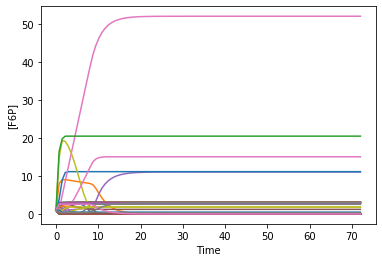

In [27]:
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, sol)
plt.xlabel('Time')
plt.ylabel('[F6P]')
plt.show()

In [28]:
from auto_reduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,10)
sys_ssm = get_SSM(sys, timepoints_ssm)
Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)
out_Ss = []
for i in range(len(params)):
    out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


KeyboardInterrupt: 

In [ ]:
import seaborn as sn
for j in range(nouts):
    sn.heatmap(out_Ss[:,:,j].T)
    plt.xlabel('Time')
    plt.ylabel('Parameters')
    plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    plt.show()

In [73]:
#i_list = [5,6,9,10,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]
i_list = [5]


timescale_list = []
for i in i_list:
    #/print(i)
    timescale_list.append(x[i])



In [74]:
timescale_list

[x5]

In [75]:
from auto_reduce.utils import reduce

timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

In [76]:
update_timescale = []
for item in x:
    if item not in timescale_list:
        update_timescale.append(item)
        

In [77]:
aa,bb = sys_reduce.solve_timescale_separation(update_timescale) #3,4,8,9

attempting reduced states index: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


KeyboardInterrupt: 